In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [5]:
df = pd.read_csv('../dataset/updated_ds_jobs_2021.csv')

#to show all rows
pd.set_option('display.max_columns', None)

In [6]:
df.sample(5)

,job_title,seniority,job_title_sim,job_description,python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,higher_degree,avg_salary_hour($),avg_salary_month($),avg_salary_year($),employer_provided,job_location,job_location_city,company,company_headquarters,company_headquarters_city,same_place,rating,number_of_workers,revenue(USD),founded,type_of_ownership,industry,sector,age,competitors,number_competitors
217,"Sr. Data Scientist - Analytics, Personalized H...",sr,Data Scientist,The Position Purpose As a Senior Data Scien...,Yes,Yes,No,Yes,Yes,No,No,No,No,No,Yes,No,No,No,No,No,Postgraduate,81.25,14083.0,169000.0,No,California,South San Francisco,Genentech,California,South San Francisco,True,3.9,10000,10000000000,1976,Subsidiary or Business Segment,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,45,No Data,0
146,MongoDB Data Engineer II,na,Data Engineer,"Designs, develops, builds and evaluates produc...",No,No,No,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,No,None,51.20,8875.0,106496.0,No,Tennessee,Chattanooga,BlueCross BlueShield of Tennessee,Tennessee,Chattanooga,True,3.8,7500,7500000000,1945,Nonprofit Organization,Insurance Carriers,Insurance,76,No Data,0
604,RESEARCH COMPUTER SCIENTIST - RESEARCH ENGINEE...,sr,Other Scientist,Serve as a software developer and researcher o...,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,None,34.38,5959.0,71510.0,No,Texas,San Antonio,Southwest Research Institute,Texas,San Antonio,True,3.9,3000,500000000,1947,Nonprofit Organization,Research & Development,Business Services,74,"Los Alamos National Laboratory, Battelle, SRI ...",3
607,Senior Research Analytical Scientist-Non-Targe...,sr,Other Scientist,RTI International is seeking a Senior Research...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Postgraduate,31.49,5458.0,65499.0,No,North Carolina,Durham,RTI International,North Carolina,Research Triangle Park,False,4.3,3000,500000000,1958,Nonprofit Organization,Research & Development,Business Services,63,"Westat, Abt Associates, Chemonics International",3
665,Data Scientist,na,Data Scientist,"Crossix is seeking intellectually curious, res...",Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,Master,50.24,8708.0,104499.0,No,New York,New York,Crossix Solutions,New York,New York,True,3.5,350,0,2005,Company - Public,Advertising & Marketing,Business Services,16,No Data,0


In [7]:
df.describe()

,avg_salary_hour($),avg_salary_month($),avg_salary_year($),rating,number_of_workers,revenue(USD),age,number_competitors
count,722.000000,722.000000,722.000000,722.000000,722.000000,7.220000e+02,722.000000,722.000000
mean,49.577119,8593.382271,103120.416898,3.669806,3382.444598,2.272040e+09,48.202216,1.080332
std,17.674990,3063.662482,36763.988856,0.598127,3765.887862,3.738539e+09,53.754082,1.392142
min,7.450000,1291.000000,15496.000000,0.000000,25.000000,0.000000e+00,0.000000,0.000000
25%,36.780000,6375.000000,76502.000000,3.300000,350.000000,0.000000e+00,13.000000,0.000000
50%,47.480000,8230.000000,98758.500000,3.700000,750.000000,3.000000e+08,26.000000,0.000000
75%,59.560000,10323.500000,123885.000000,4.000000,7500.000000,1.500000e+09,60.000000,3.000000
max,122.120000,21168.000000,254010.000000,5.000000,10000.000000,1.000000e+10,277.000000,4.000000


What we will do:

MELHORAR OS GRAFICOS

- word map for job_title [Done]
- word map for job_title_sim [Done]
- word map for job_description [Done]
- map for job_location - [POWERBI]
- map for company_headquarters [POWERBI]
- compare each skill with salary [Done]
- compare rating with salary [Done]
- compare type_of_ownership with salary [Done]
- compare industry with salary [Done]
- compare number of competitors with salary [Done]
- compare higher_degree with salary [Done]
- compare employer_provided with salary [Done]
- compare job_location with salary [Done]
- compare company_headquarters with salary [Done]
- compare age with salary [Done]
- compare job_description size with salary [Done]
- compare job_title_sim size with salary [Done]
- compare revenue with salary [Done]
- compare seniority with salary [Done]


In [8]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
columns_to_exclude = ['avg_salary_hour($)', 'avg_salary_month($)']
columns_to_include = [col for col in numeric_columns if col not in columns_to_exclude]

df[columns_to_include].corr()

,avg_salary_year($),rating,number_of_workers,revenue(USD),age,number_competitors
avg_salary_year($),1.000000,0.062540,0.088157,0.134735,0.027259,0.057645
rating,0.062540,1.000000,-0.104079,-0.100225,-0.049423,-0.028564
number_of_workers,0.088157,-0.104079,1.000000,0.803945,0.557186,0.211000
revenue(USD),0.134735,-0.100225,0.803945,1.000000,0.651774,0.217903
age,0.027259,-0.049423,0.557186,0.651774,1.000000,0.120569
number_competitors,0.057645,-0.028564,0.211000,0.217903,0.120569,1.000000


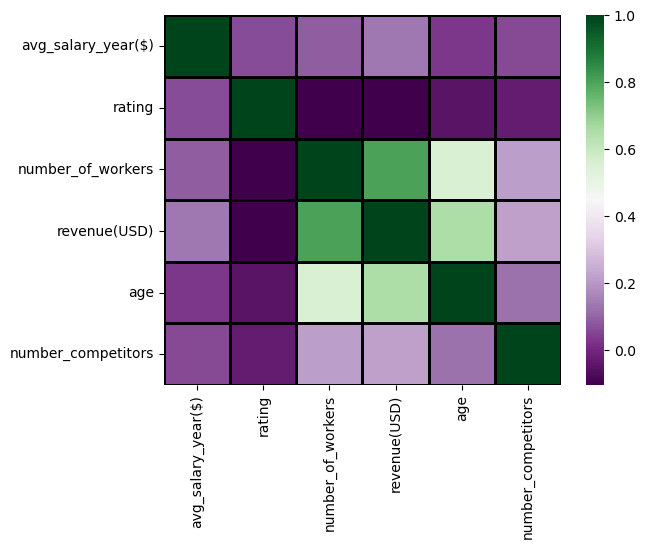

In [9]:
sns.heatmap(df[columns_to_include].corr(), annot=False, cmap='PRGn', linecolor='black', linewidths=0.8)
plt.show()

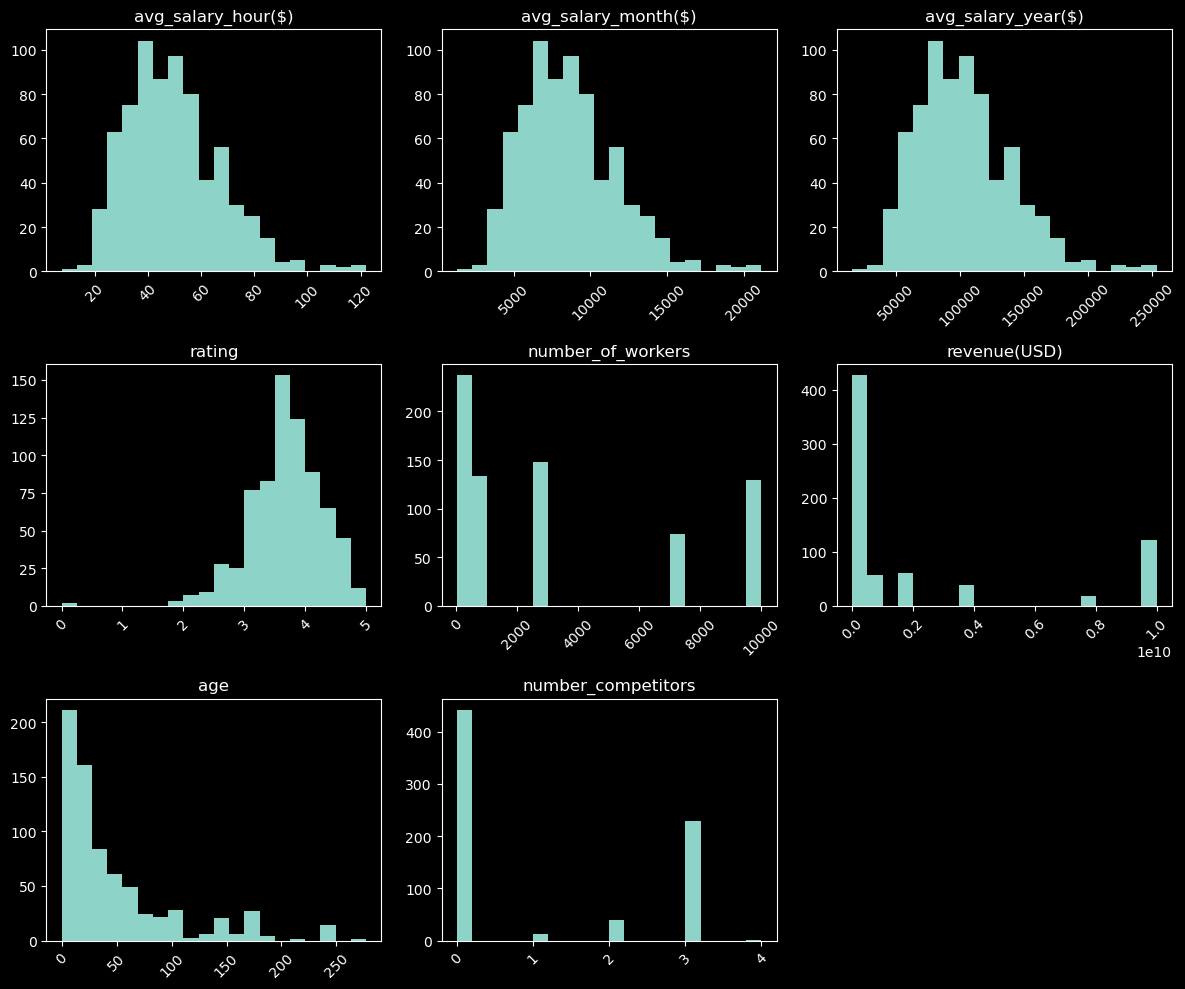

In [10]:
# Set a dark background style for the plots
plt.style.use('dark_background')

# Plot histograms for all numeric columns with larger figure size, rotated x-axis labels, some space between subplots, and dark background
df.hist(figsize=(12, 10), xrot=45, layout=(3, 3), bins=20, grid=False)
plt.tight_layout()
plt.show()

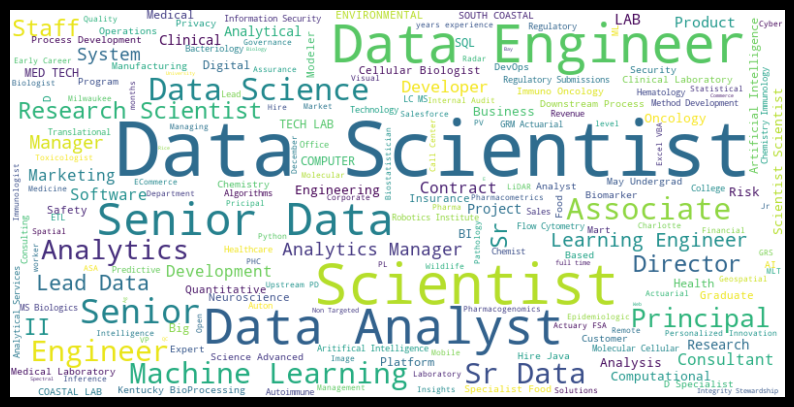

In [11]:
# Generate a word cloud for the 'job_title' column
wordcloud_title = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['job_title']))

# Display the word cloud for job_title
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.show()


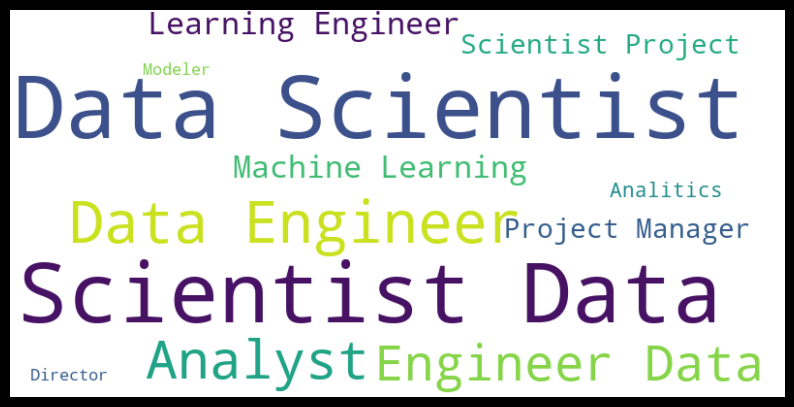

In [12]:
# Generate a word cloud for the 'job_title_sim' column
wordcloud_title_sim = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['job_title_sim']))

# Display the word cloud for job_title_sim
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_title_sim, interpolation='bilinear')
plt.axis('off')
plt.show()

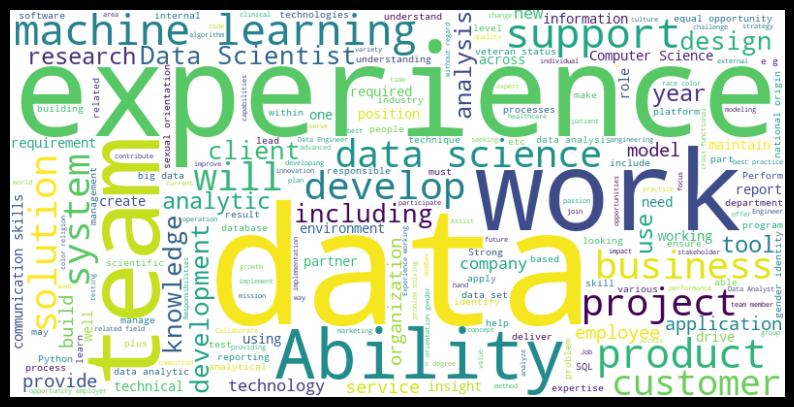

In [13]:
# Generate a word cloud for the 'job_description' column
wordcloud_description = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['job_description']))

# Display the word cloud for job_description
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_description, interpolation='bilinear')
plt.axis('off')
plt.show()

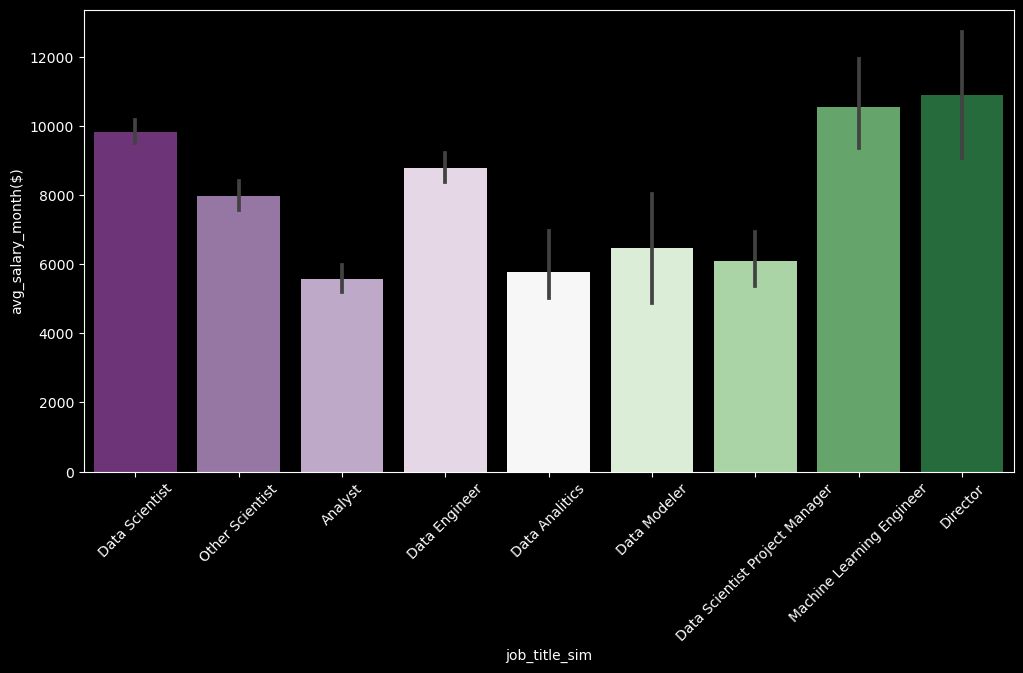

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='job_title_sim', y='avg_salary_month($)', data=df, palette='PRGn')
plt.xticks(rotation=45)
plt.show()

In [15]:
pd.pivot_table(df, index = ['job_title_sim','seniority'], values = 'avg_salary_month($)')

avg_salary_month($)
job_title_sim                  seniority                     
Analyst                        jr                 4437.500000
                               na                 5101.486111
                               sr                 6860.925926
Data Analitics                 na                 5771.250000
Data Engineer                  na                 8058.390244
                               sr                10390.837838
Data Modeler                   na                 6458.600000
Data Scientist                 jr                 8875.000000
                               na                 9146.799043
                               sr                11299.220000
Data Scientist Project Manager na                 6101.812500
Director                       na                10900.200000
Machine Learning Engineer      na                 9928.066667
                               sr                11839.571429
Other Scientist                na                 7369.217391
                               sr                 9247.931818

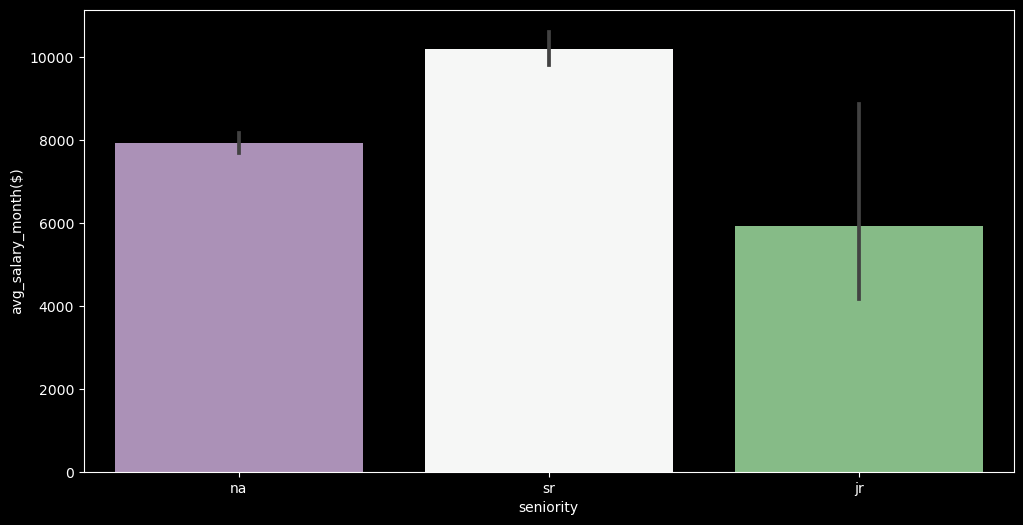

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='seniority', y='avg_salary_month($)', data=df, palette='PRGn')
plt.show()

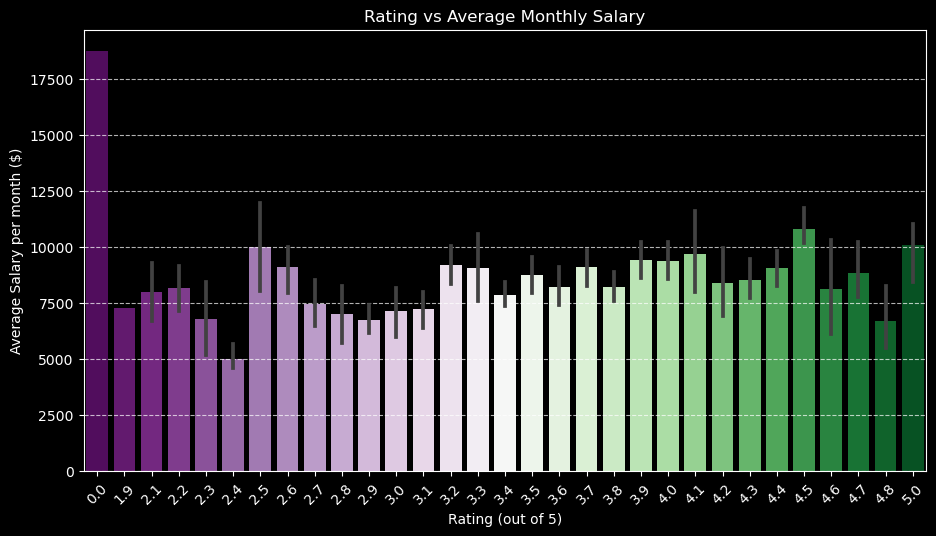

In [17]:
# Extracting rating and avg_salary_month columns
ratings = df['rating']
avg_salary = df['avg_salary_month($)']

# Creating a bar plot with seaborn 
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='avg_salary_month($)', data=df, palette='PRGn', saturation=1)
plt.xlabel('Rating (out of 5)')
plt.ylabel('Average Salary per month ($)')
plt.title('Rating vs Average Monthly Salary')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.show()

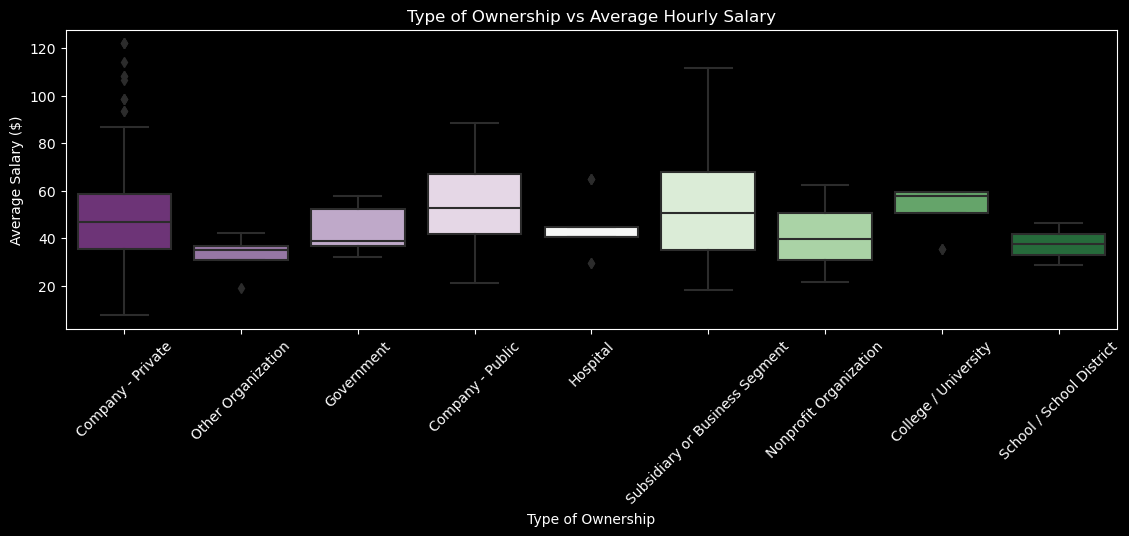

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type_of_ownership', y='avg_salary_hour($)', data=df, palette='PRGn')
plt.xlabel('Type of Ownership')
plt.ylabel('Average Salary ($)')
plt.title('Type of Ownership vs Average Hourly Salary')
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.show()

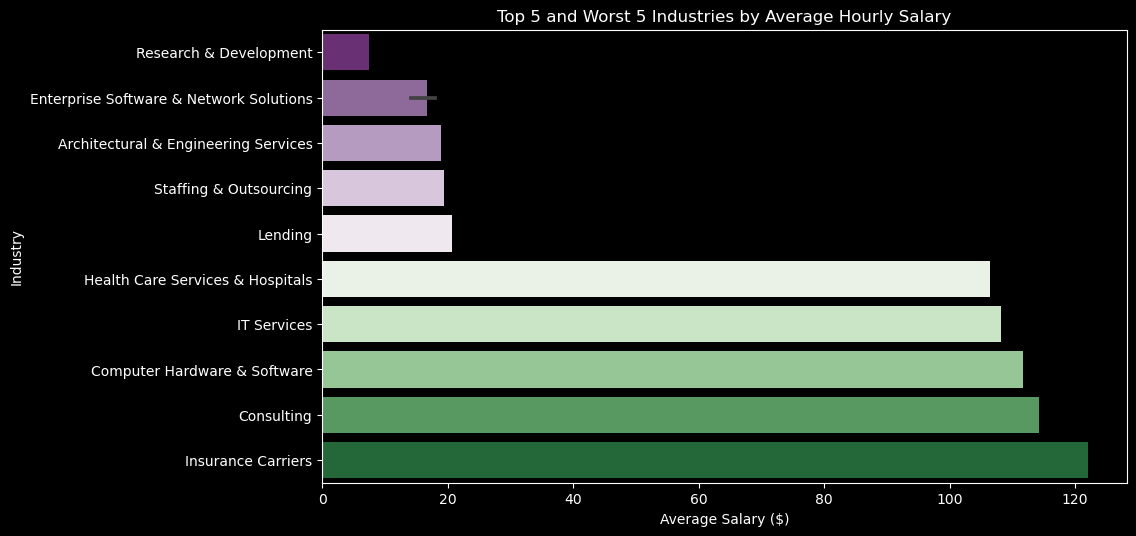

In [19]:
# Sort the DataFrame by avg_salary_hour($) in ascending order
df_sorted = df.sort_values('avg_salary_hour($)', ascending=True)

# Get the top 5 and worst 5 entries
df_top_worst = pd.concat([df_sorted.head(8), df_sorted.tail(8)])

# Create the bar plot for the top and worst 5 industries
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_salary_hour($)', y='industry', data=df_top_worst, palette='PRGn')
plt.xlabel('Average Salary ($)')
plt.ylabel('Industry')
plt.title('Top 5 and Worst 5 Industries by Average Hourly Salary')
plt.tight_layout(pad=3.0)
plt.show()

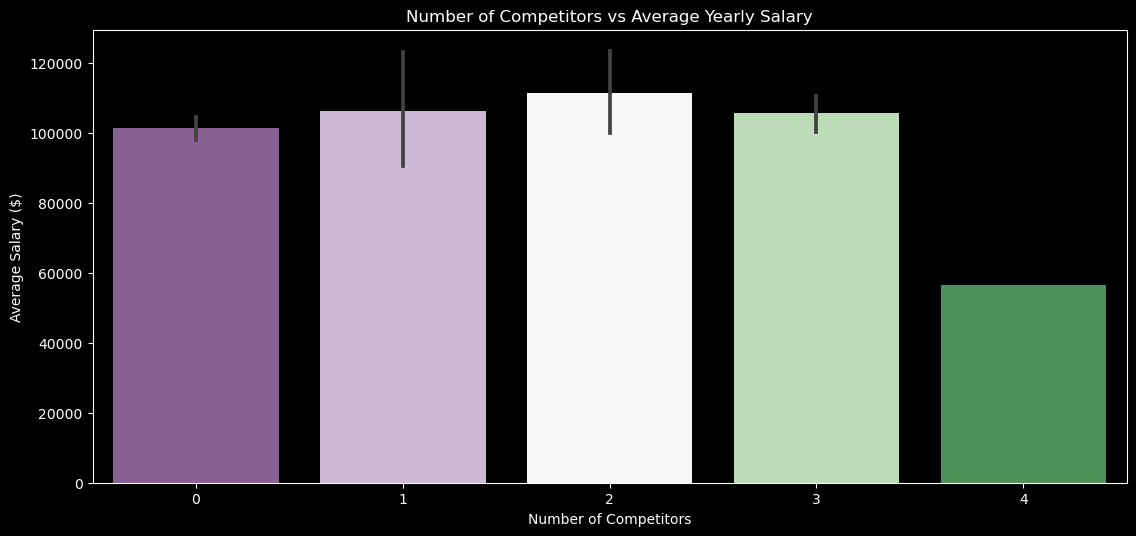

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='number_competitors', y='avg_salary_year($)', data=df, palette='PRGn')
plt.xlabel('Number of Competitors')
plt.ylabel('Average Salary ($)')
plt.title('Number of Competitors vs Average Yearly Salary')
plt.tight_layout(pad=3.0)
plt.show()

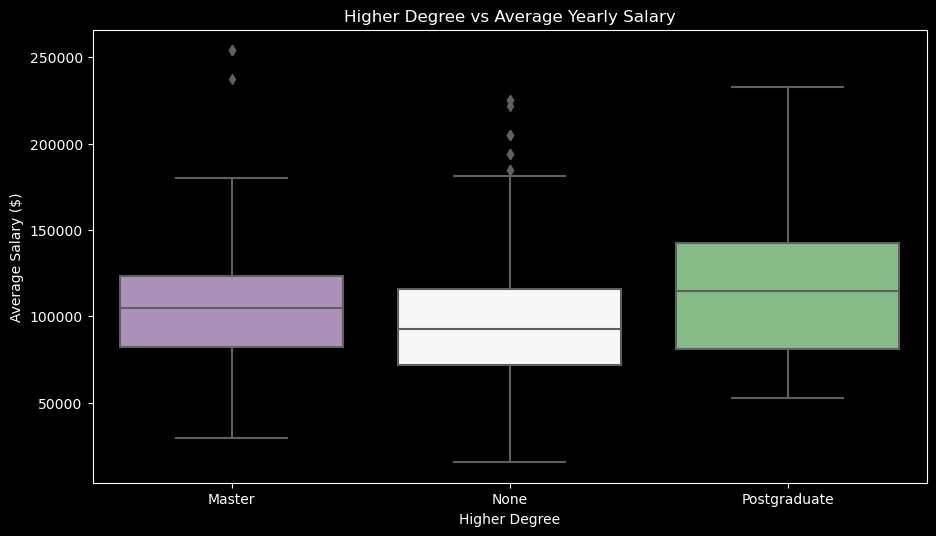

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='higher_degree', y='avg_salary_year($)', data=df, palette='PRGn')
plt.xlabel('Higher Degree')
plt.ylabel('Average Salary ($)')
plt.title('Higher Degree vs Average Yearly Salary')
plt.tight_layout(pad=3.0)
plt.show()

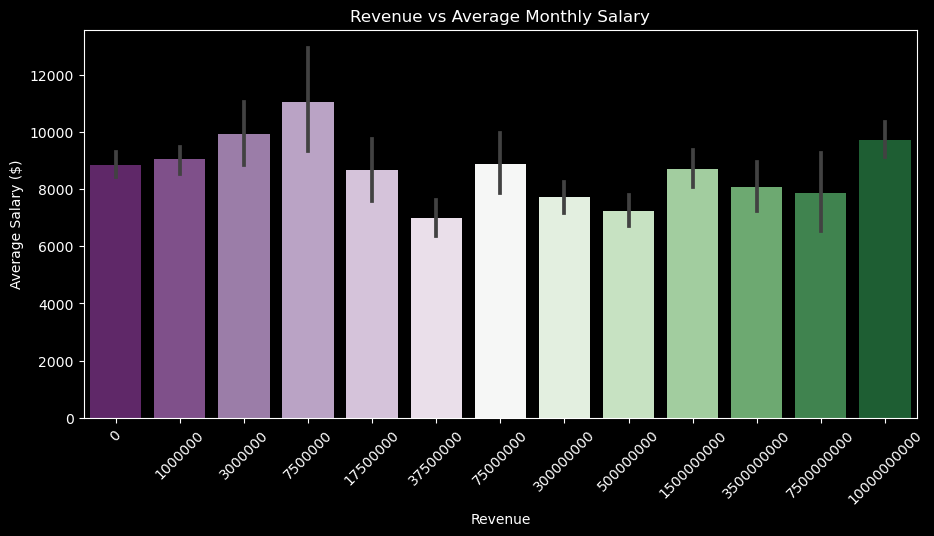

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='revenue(USD)', y='avg_salary_month($)', data=df, palette='PRGn')
plt.xlabel('Revenue')
plt.ylabel('Average Salary ($)')
plt.title('Revenue vs Average Monthly Salary')
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.show()

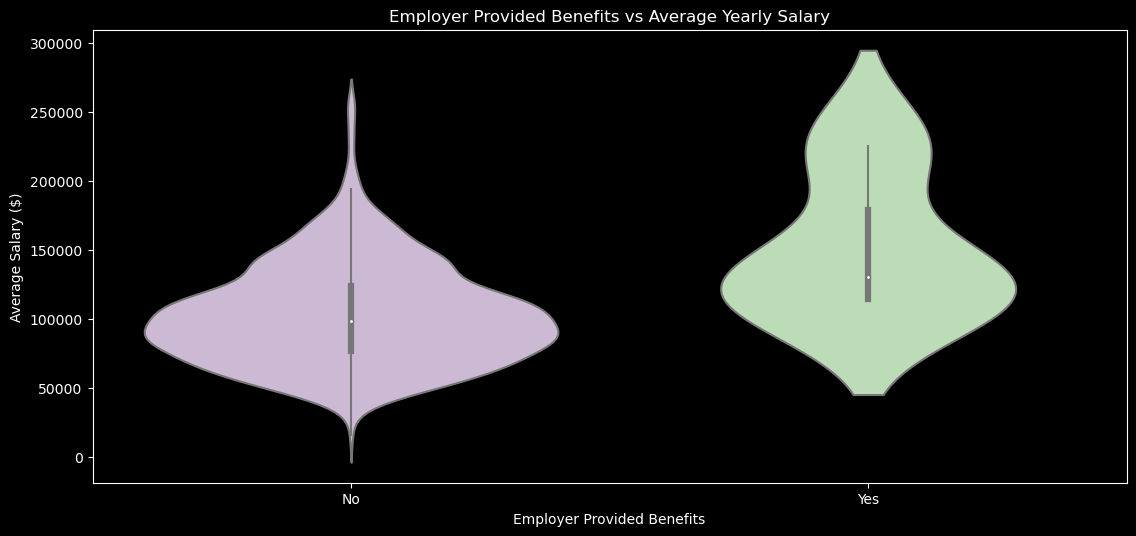

In [22]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='employer_provided', y='avg_salary_year($)', data=df, palette='PRGn')
plt.xlabel('Employer Provided Benefits')
plt.ylabel('Average Salary ($)')
plt.title('Employer Provided Benefits vs Average Yearly Salary')
plt.tight_layout(pad=3.0)
plt.show()

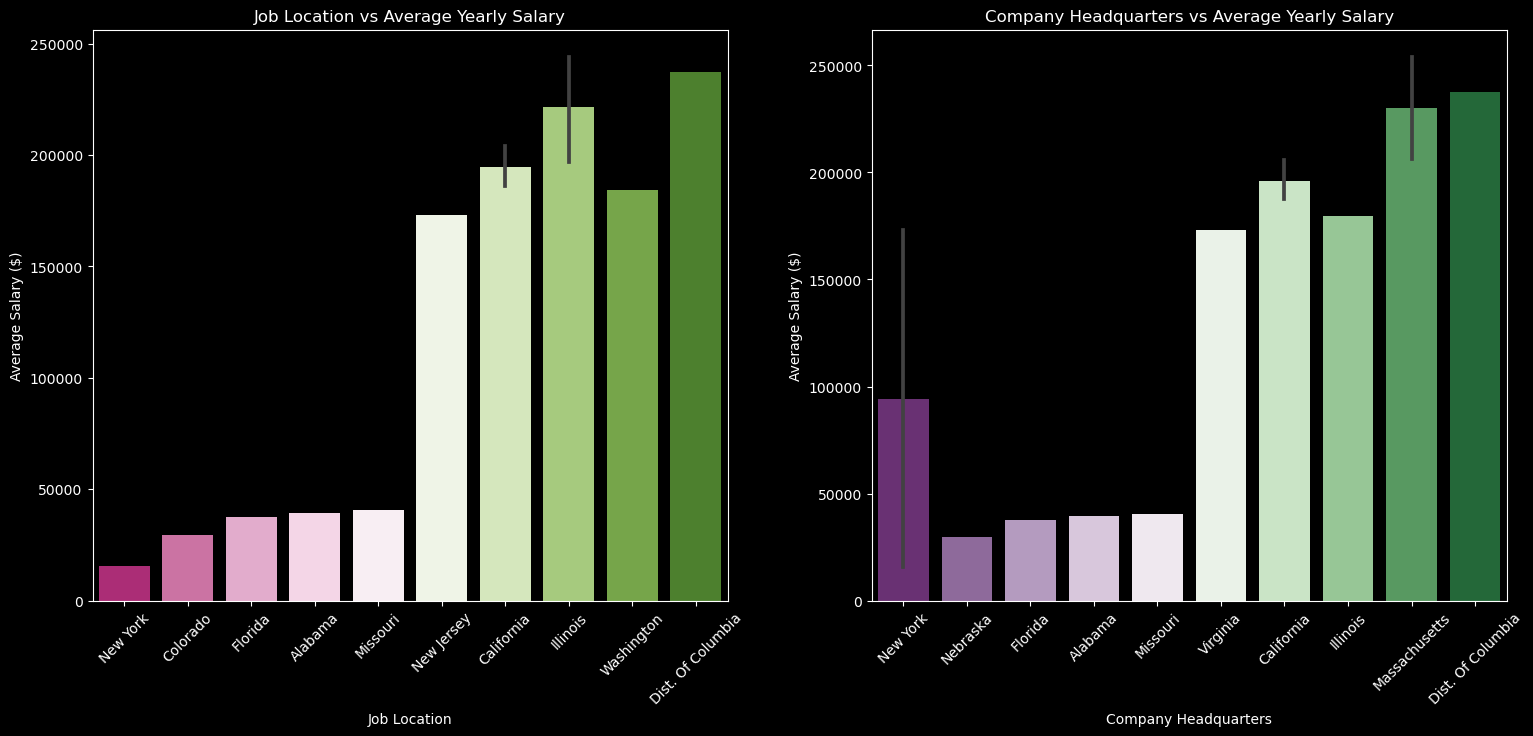

In [23]:
# Sort the DataFrame by avg_salary_hour($) in ascending order
df_sorted = df.sort_values('avg_salary_hour($)', ascending=True)

# Get the top 5 and worst 5 entries
df_top_worst = pd.concat([df_sorted.head(6), df_sorted.tail(28)])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.barplot(x='job_location', y='avg_salary_year($)', data=df_top_worst, palette='PiYG')
plt.xlabel('Job Location')
plt.ylabel('Average Salary ($)')
plt.title('Job Location vs Average Yearly Salary')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='company_headquarters', y='avg_salary_year($)', data=df_top_worst, palette='PRGn')
plt.xlabel('Company Headquarters')
plt.ylabel('Average Salary ($)')
plt.title('Company Headquarters vs Average Yearly Salary')
plt.xticks(rotation=45)
plt.tight_layout(pad=3.0)
plt.show()

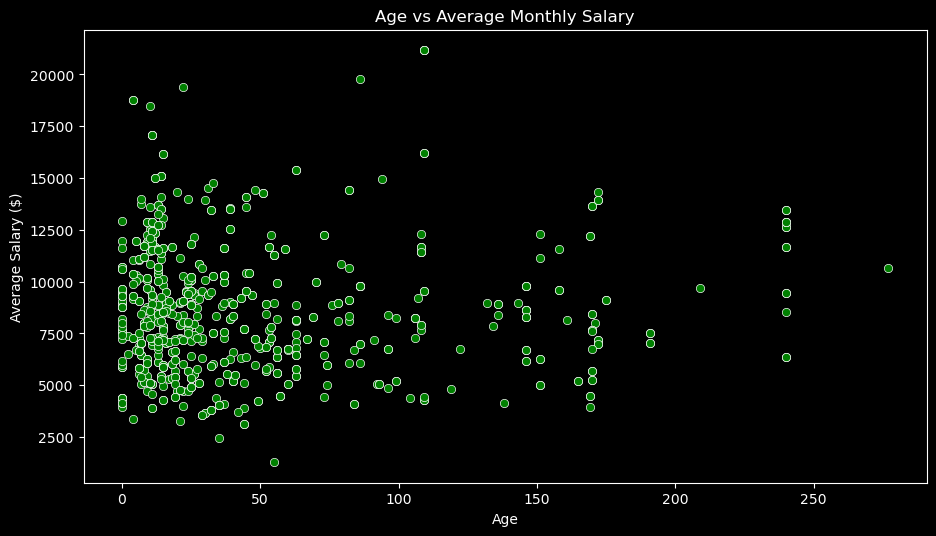

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='avg_salary_month($)', data=df, color='green')
plt.xlabel('Age')
plt.ylabel('Average Salary ($)')
plt.title('Age vs Average Monthly Salary')
plt.tight_layout(pad=3.0)
plt.show()

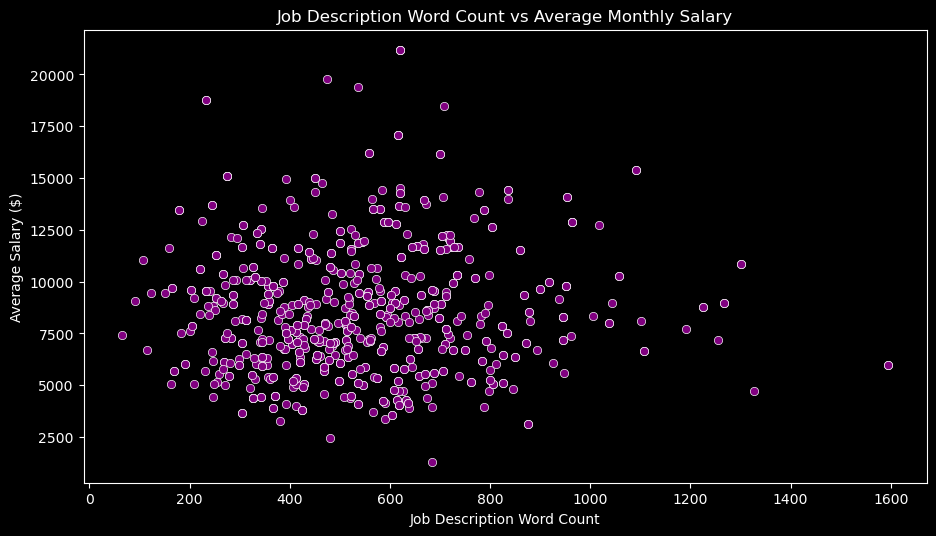

In [25]:
plt.figure(figsize=(10, 6))
df['job_description_word_count'] = df['job_description'].apply(lambda x: len(x.split()))
sns.scatterplot(x='job_description_word_count', y='avg_salary_month($)', data=df, color='purple')
plt.xlabel('Job Description Word Count')
plt.ylabel('Average Salary ($)')
plt.title('Job Description Word Count vs Average Monthly Salary')
plt.tight_layout(pad=3.0)
plt.show()

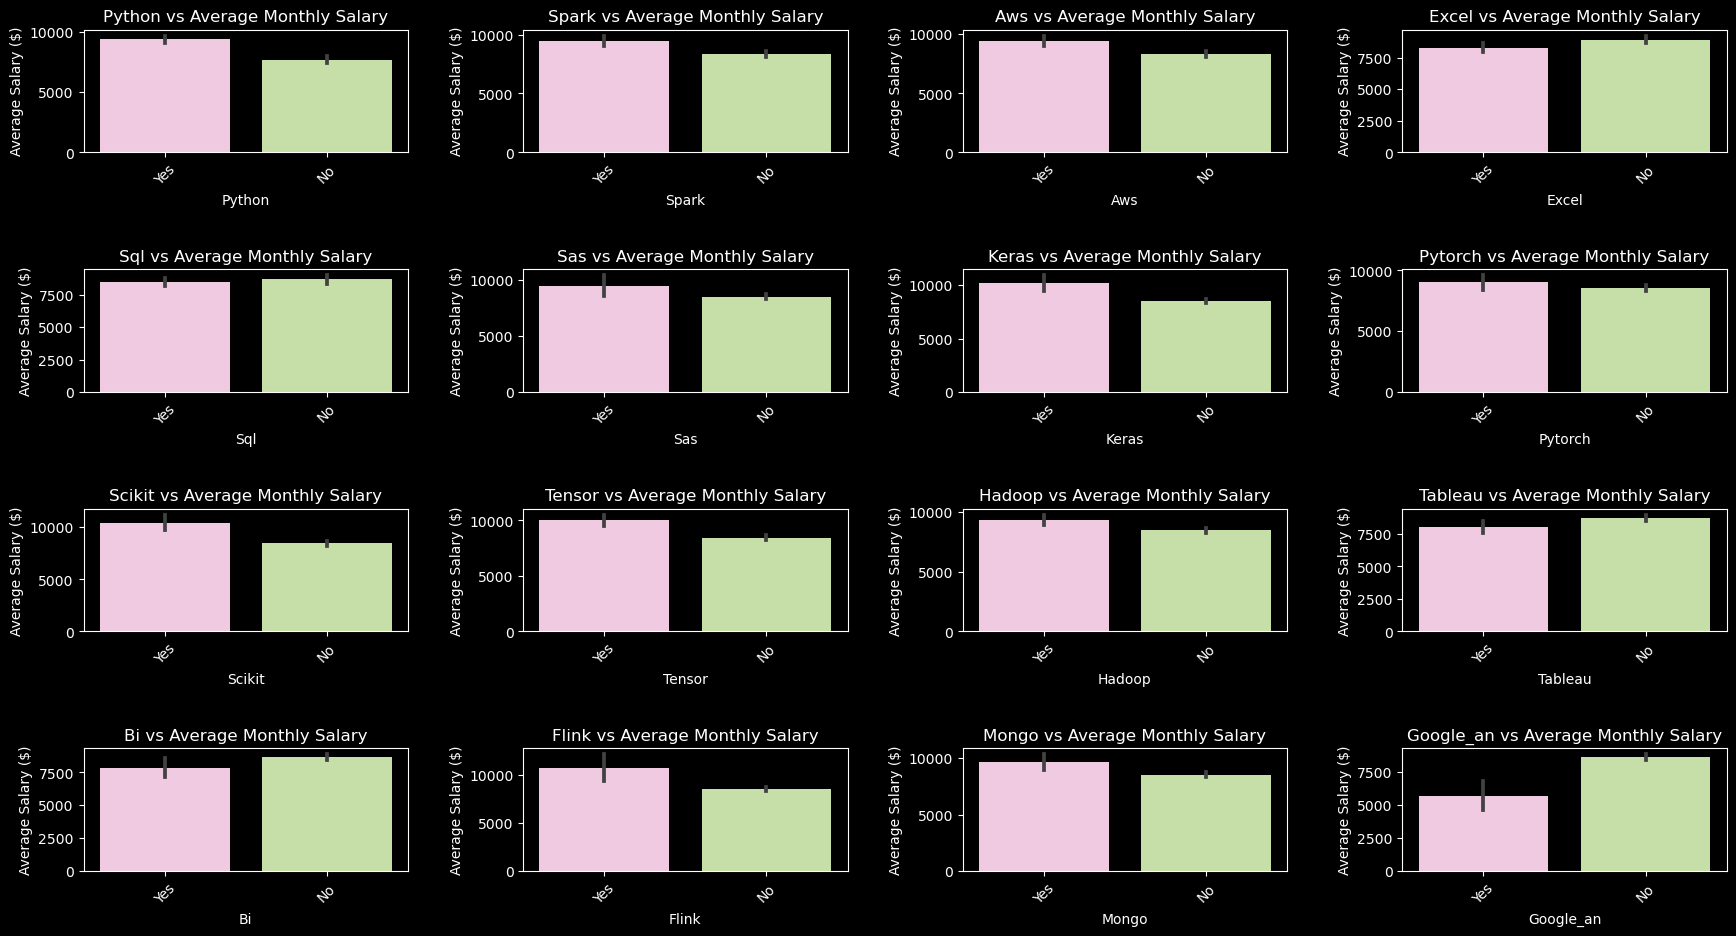

In [26]:
skills = ['python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']
plt.figure(figsize=(18, 10))

for i, skill in enumerate(skills):
    plt.subplot(4, 4, i+1)
    sns.barplot(x=skill, y='avg_salary_month($)', data=df, order=['Yes', 'No'], palette='PiYG')
    plt.xlabel(skill.capitalize())
    plt.ylabel('Average Salary ($)')
    plt.title(f'{skill.capitalize()} vs Average Monthly Salary')
    plt.xticks(rotation=45)

plt.tight_layout(pad=3.0)
plt.show()

In [27]:
df.columns

Index(['job_title', 'seniority', 'job_title_sim', 'job_description', 'python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'higher_degree', 'avg_salary_hour($)', 'avg_salary_month($)',
       'avg_salary_year($)', 'employer_provided', 'job_location',
       'job_location_city', 'company', 'company_headquarters',
       'company_headquarters_city', 'same_place', 'rating',
       'number_of_workers', 'revenue(USD)', 'founded', 'type_of_ownership',
       'industry', 'sector', 'age', 'competitors', 'number_competitors',
       'job_description_word_count'],
      dtype='object')